# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [66]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
Countries=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    countries=citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        Countries.append(countries)

# Print the city count to confirm sufficient count
len(cities)


645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
#Creating Dataframe
Weather_data=pd.DataFrame({'City':cities})

Weather_data['Cloudiness']=''
Weather_data['Country']=Countries
Weather_data['Date']=''
Weather_data['Humidity']=''
Weather_data['Lat']=''
Weather_data['Lng']=''
Weather_data['Max Temp']=''
Weather_data['Wind Speed']=''
#Dropping Duplicate Cities
Weather_data=Weather_data.drop_duplicates('City')
#converting in upper case
Weather_data.Country=Weather_data.Country.str.upper()
Weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,,ZA,,,,,,
1,fairbanks,,US,,,,,,
2,khatanga,,RU,,,,,,
3,saleaula,,WS,,,,,,
4,nicoya,,CR,,,,,,


In [68]:

url="http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
#counters for priting format
timer=0
counter=1
print("Beginning Data Retrival")
print("-------------------------------")
for index,row in Weather_data.iterrows():
    
    query_url= f"{url}appid={api_key}&units={units}&q={row['City']}"
    response = requests.get(query_url).json()
    
    
    timer=timer+1
    print(f"Processing Record {timer} of Set {counter} | {row['City']}")
    try:     
        Weather_data.set_value(index, "Lat", response["coord"]["lat"])
        Weather_data.set_value(index, "Lng", response["coord"]["lon"])
        Weather_data.set_value(index, "Date", response["dt"])
        Weather_data.set_value(index, "Humidity", response["main"]["humidity"])
        Weather_data.set_value(index, "Max Temp", response["main"]["temp_max"])
        Weather_data.set_value(index, "Wind Speed", response["wind"]["speed"])
        Weather_data.set_value(index, "Cloudiness", response["clouds"]["all"])
    except:
        print("City not found. Skipping...")
        Weather_data.set_value(index, "Lat",'NaN')
        Weather_data.set_value(index, "Lng", 'NaN')
        Weather_data.set_value(index, "Date", 'NaN')
        Weather_data.set_value(index, "Humidity", 'NaN')
        Weather_data.set_value(index, "Max Temp", 'NaN')
        Weather_data.set_value(index, "Wind Speed", 'NaN')
        Weather_data.set_value(index, "Cloudiness", 'NaN')
    if (timer % 50) == 0:
        counter=counter+1
        timer=0
print("---------------------------------------------")

Beginning Data Retrival
-------------------------------
Processing Record 1 of Set 1 | hermanus


C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: set_value is de

Processing Record 2 of Set 1 | fairbanks
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | saleaula
City not found. Skipping...


C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\lalit\anaconda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:31: FutureWarning: set_value is de

Processing Record 5 of Set 1 | nicoya
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | zhangjiakou
Processing Record 9 of Set 1 | uzhhorod
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | tual
Processing Record 12 of Set 1 | kottayam
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | okhotsk
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | kargasok
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | clarence town
Processing Record 23 of Set 1 | ketchikan
Processing Record 24 of Set 1 | umm lajj
Processing Record 25 of Set 1 | masaki
Processing Record 26 of Set 1 | canon city
Processing Record 27 of Set 1 | saint-donat-de-montcalm
P

Processing Record 39 of Set 4 | sao joao batista
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | san cristobal
Processing Record 42 of Set 4 | madera
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | vangaindrano
Processing Record 45 of Set 4 | srandakan
Processing Record 46 of Set 4 | shenyang
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | latung
Processing Record 50 of Set 4 | lucea
Processing Record 1 of Set 5 | vestmannaeyjar
Processing Record 2 of Set 5 | bengkulu
City not found. Skipping...
Processing Record 3 of Set 5 | merauke
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | samusu
City not found. Skipping...
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | chyhyryn
Processing Record 8 of Set 5 | mandera
Processing Record 9 of Set 5 | nichlaul
Processing Record 10 of Set 5 | canavieiras
Pro

Processing Record 26 of Set 8 | road town
Processing Record 27 of Set 8 | mayor pablo lagerenza
Processing Record 28 of Set 8 | maceio
Processing Record 29 of Set 8 | belica
Processing Record 30 of Set 8 | peterhead
Processing Record 31 of Set 8 | meulaboh
Processing Record 32 of Set 8 | asau
City not found. Skipping...
Processing Record 33 of Set 8 | keighley
Processing Record 34 of Set 8 | madimba
Processing Record 35 of Set 8 | morros
Processing Record 36 of Set 8 | kropotkin
Processing Record 37 of Set 8 | safwah
City not found. Skipping...
Processing Record 38 of Set 8 | newport
Processing Record 39 of Set 8 | itarema
Processing Record 40 of Set 8 | caravelas
Processing Record 41 of Set 8 | port-cartier
Processing Record 42 of Set 8 | amderma
City not found. Skipping...
Processing Record 43 of Set 8 | negele
City not found. Skipping...
Processing Record 44 of Set 8 | salou
Processing Record 45 of Set 8 | taikang
Processing Record 46 of Set 8 | hinundayan
Processing Record 47 of Se

Processing Record 8 of Set 12 | revelstoke
Processing Record 9 of Set 12 | thinadhoo
Processing Record 10 of Set 12 | xudat
Processing Record 11 of Set 12 | cockburn town
Processing Record 12 of Set 12 | dengfeng
Processing Record 13 of Set 12 | fredericksburg
Processing Record 14 of Set 12 | anadyr
Processing Record 15 of Set 12 | miles city
Processing Record 16 of Set 12 | azimur
City not found. Skipping...
Processing Record 17 of Set 12 | saint-augustin
Processing Record 18 of Set 12 | warqla
City not found. Skipping...
Processing Record 19 of Set 12 | kjollefjord
Processing Record 20 of Set 12 | dwarka
Processing Record 21 of Set 12 | narrabri
Processing Record 22 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 23 of Set 12 | ye
City not found. Skipping...
Processing Record 24 of Set 12 | visselhovede
Processing Record 25 of Set 12 | te anau
Processing Record 26 of Set 12 | mizan teferi
Processing Record 27 of Set 12 | kavieng
Processing Record 28 of Set 12 | kin

In [69]:
#filling the empty columns with NaN and Dropping them
Weather_data.replace(["NaN"], np.nan, inplace = True)
Weather_data= Weather_data.dropna()


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
Weather_data.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

In [71]:
Weather_data.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [72]:
Weather_data.astype(str).head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,0.0,ZA,1536632568.0,96.0,-34.42,19.24,35.08,3.4
1,fairbanks,1.0,US,1536631080.0,5.0,64.84,-147.72,62.06,6.93
2,khatanga,68.0,RU,1536632568.0,80.0,71.98,102.47,42.01,10.78
4,nicoya,75.0,CR,1536631200.0,94.0,10.15,-85.45,73.4,4.7
5,ribeira grande,0.0,PT,1536632569.0,96.0,38.52,-28.7,75.04,8.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

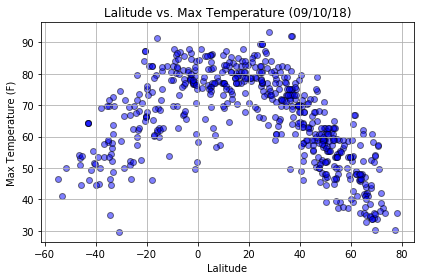

In [73]:
#Latitude Vs Temperature Plot
Lat_Temp=plt.scatter(Weather_data['Lat'],Weather_data['Max Temp'],facecolor='blue',marker='o',alpha=0.5,edgecolors='black')
plt.title("Lalitude vs. Max Temperature (09/10/18)")
plt.xlabel("Lalitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Lalitude vs. Max Temperature.png")
plt.show()


#### Latitude vs. Humidity Plot

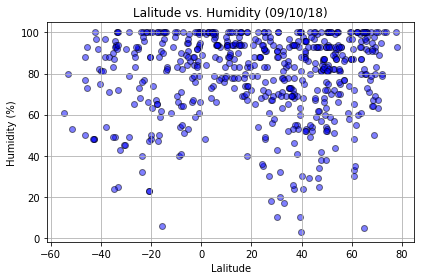

In [74]:
#Latitude Vs Humidity Plot
Lat_hum=plt.scatter(Weather_data['Lat'],Weather_data['Humidity'],facecolor='blue',marker='o',alpha=0.5,edgecolors='black')
plt.title("Lalitude vs. Humidity (09/10/18)")
plt.xlabel("Lalitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Lalitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

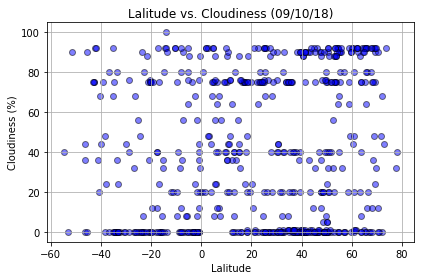

In [75]:
#Latitude Vs Cloudiness Plot
Lat_cloud=plt.scatter(Weather_data['Lat'],Weather_data['Cloudiness'],facecolor='blue',marker='o',alpha=0.5,edgecolors='black')
plt.title("Lalitude vs. Cloudiness (09/10/18)")
plt.xlabel("Lalitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Lalitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

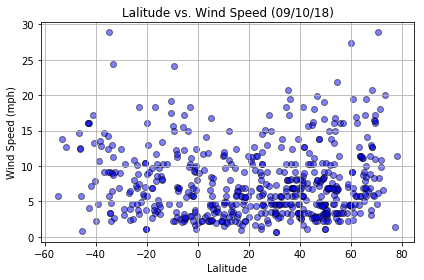

In [76]:
#Latitude Vs wind speed Plot
Lat_WSP=plt.scatter(Weather_data['Lat'],Weather_data['Wind Speed'],facecolor='blue',marker='o',alpha=0.5,edgecolors='black')
plt.title("Lalitude vs. Wind Speed (09/10/18)")
plt.xlabel("Lalitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Lalitude vs. Wind Speed.png")
plt.show()